In [561]:
import pandas as pd
import numpy as np
import random
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
from pd_funcs import clean_funcs
from scipy.stats import anderson, kstest, norm, shapiro
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
import pylab
from IPython.display import Image as imgx

importlib.reload(clean_funcs)

df1 = pd.read_csv('./sample/2022Movies.csv', on_bad_lines='skip')
df1ori=df1.copy()

In [556]:
dfclean = clean_funcs.clean_movie(df1)
df1

,Title,rank,Year,certificate,Time,genre,inlineblock,Score,textmuted,director,actor1,actor2,actor3,actor4,reviews,Unnamed: 15
0,Avatar: The Way of Water,1.,(2022),PG-13,192 min,"\nAction, Adventure, Fantasy",7.8,\n67 \n Metascore\n,\nJake Sully lives with his newfound family fo...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"274,631",NaN
1,The Menu,2.,(2022),R,107 min,"\nHorror, Thriller",7.2,\n71 \n Metascore\n,\nA young couple travels to a remote island to...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"203,241",NaN
2,Babylon,3.,(I) (2022),R,189 min,"\nComedy, Drama, History",7.5,\n60 \n Metascore\n,\nA tale of outsized ambition and outrageous e...,Damien Chazelle,Brad Pitt,Margot Robbie,Jean Smart,Olivia Wilde,"39,157",NaN
3,Everything Everywhere All at Once,4.,(2022),R,139 min,"\nAction, Adventure, Comedy",8.0,\n81 \n Metascore\n,\nA middle-aged Chinese immigrant is swept up ...,Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,"310,893",NaN
4,M3GAN,5.,(2022),PG-13,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\n72 \n Metascore\n,\nA robotics engineer at a toy company builds ...,Gerard Johnstone,Allison Williams,Violet McGraw,Ronny Chieng,Amie Donald,"47,525",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,2022 League of Legends World Championship,"10,146.",(2022),Unrated,330 min,NaN,6.2,\n68 \n Metascore\n,"\nDon't miss any of the action, strategy, and ...",NaN,NaN,NaN,NaN,NaN,"2,500",NaN
10029,Que Buena Broma Bromelia,"10,147.",(2022),Not Rated,99 min,NaN,6.8,\n68 \n Metascore\n,\n Add a Plot\n,Juliana Cuervos,Yulika Krausz,María Cristina Lozada,Rolando Padilla,NaN,8,NaN
10030,Eri Ife,"10,148.",(2022),Not Rated,60 min,\nComedy,6.2,\n68 \n Metascore\n,\n Add a Plot\n,Muhydeen S. Ayinde,Seilat Adebowale,Ivy Blessing Agbo,Mercy Aigbe,Adeola Ajewoyin,"2,500",NaN
10031,Recluse,"10,149.",(2022),Not Rated,60 min,NaN,6.2,\n68 \n Metascore\n,\nDeep in the work of resolving the phobias an...,Ipiluni,NaN,NaN,NaN,NaN,"2,500",NaN


In [363]:
#Lets clean genre together...

array([nan])

In [415]:
group_b = [91, 68, 69, 40, 80, 29, 50, 74, 69, 52, 57, 45, 50, 88, 59, 82, 
             90, 85, 40, 60, 72, 37, 87, 58, 63, 56, 85, 84, 71, 64, 80, 61,
             82, 58, 96, 61, 62, 73, 66, 82, 60, 40, 92, 82, 55, 91, 79, 79,
             85, 38, 19, 40, 84, 83, 51, 62, 79, 42, 64, 80, 35, 67, 88, 99,
             67, 86, 78, 68, 79, 92, 94, 87, 64, 51, 81, 78, 75, 52, 60, 83]


stat, p = shapiro(group_b[:50])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
     print('Probably not Gaussian')

stat=0.961, p=0.096
Probably Gaussian


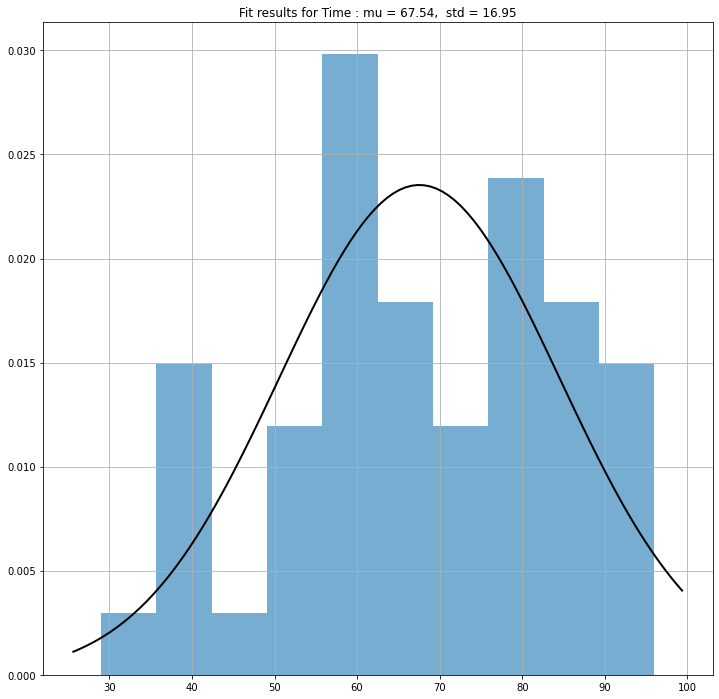

In [440]:
clean_funcs.plot_pdf(group_b[:50], 'Time' , n_bins=10)

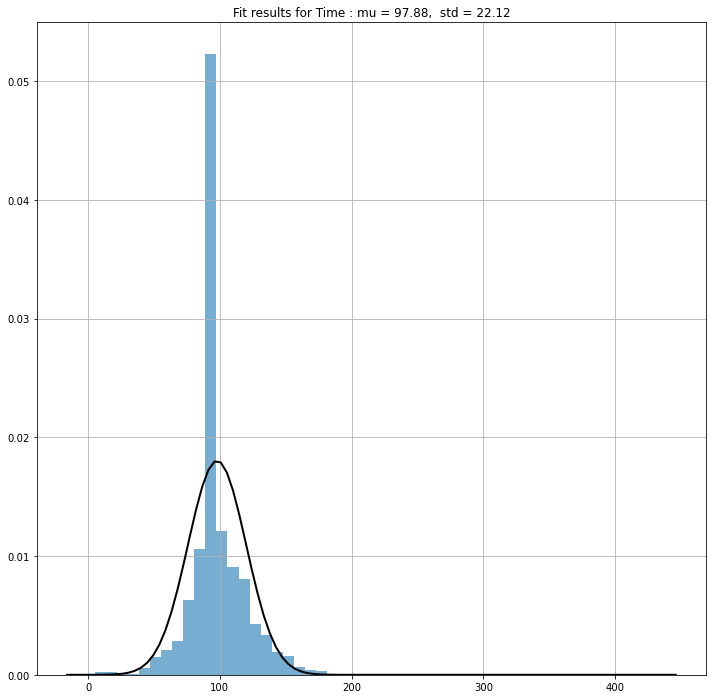

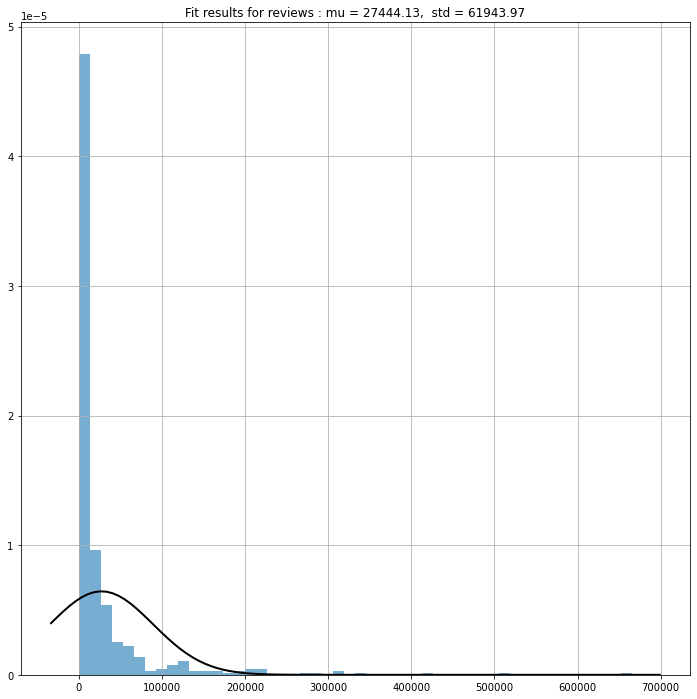

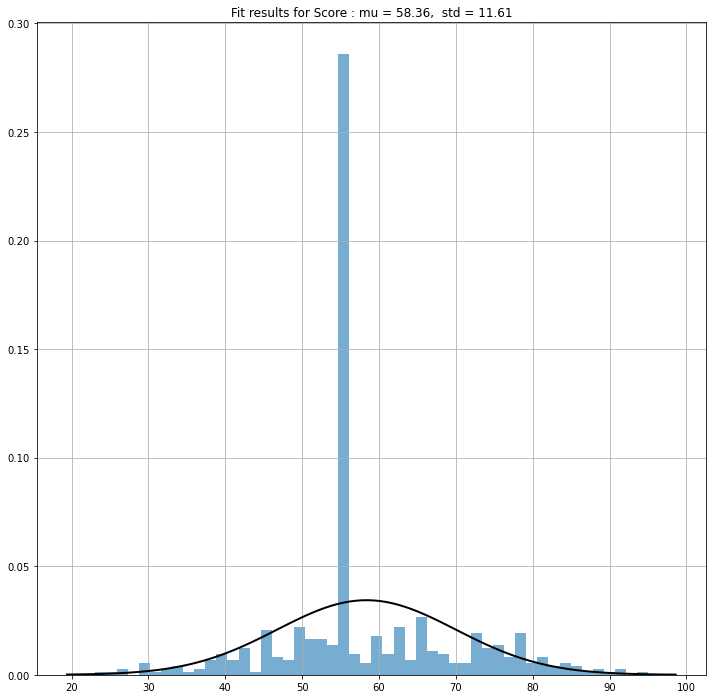

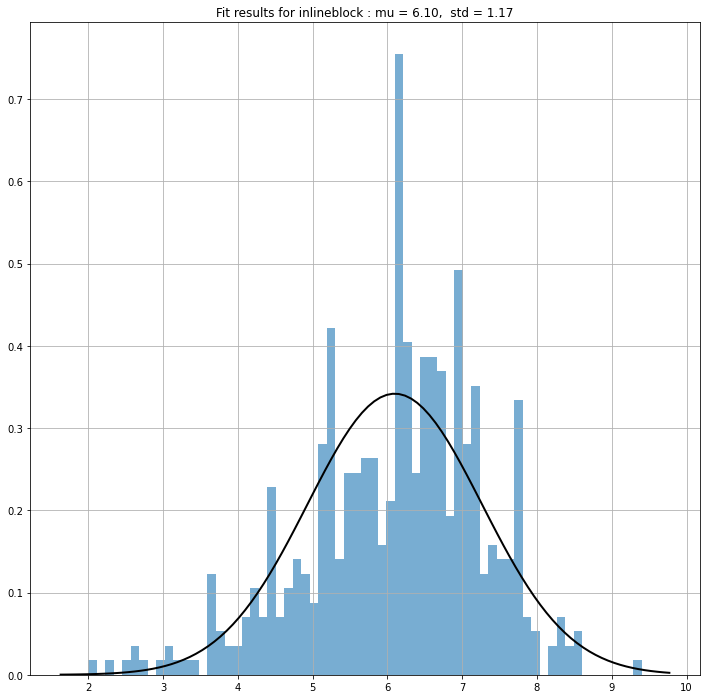

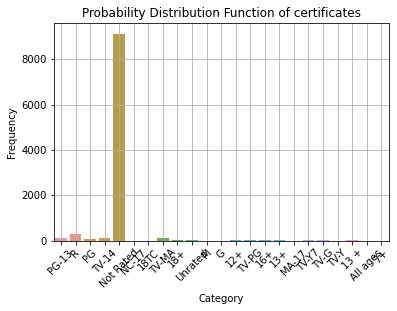

In [454]:
timed = [int( x.replace(' min','')) for x in dfclean['Time']]
revd = [int( x.replace(',','')) for x in dfclean['reviews']]
scored = [int(x.split('\n')[1].strip()) for x in dfclean['Score']]
inlinebd = [float(x) for x in dfclean['inlineblock']]

clean_funcs.plot_pdf(timed[:], 'Time' , n_bins=50)

clean_funcs.plot_pdf(revd[:500], 'reviews', n_bins=50)

clean_funcs.plot_pdf(scored[:500], 'Score', n_bins=50)

clean_funcs.plot_pdf(inlinebd[:500] , 'inlineblock', n_bins=65)

sns.countplot(x='certificate', data=dfclean)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Probability Distribution Function of certificates")
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [342]:
#Has gaussian distribution
#Timed

#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

#Check Normal Distribution

stat, p = shapiro(np.array(timed[:4500]))
print("Shapiro Stat:", stat, "p-value", p)

stat, p = normaltest(np.array(timed[:]))
print("Nortmaltest Stat:", stat, "p-value", p)

ks_statistic, p_value = kstest(np.array(timed[:7000]), 'norm')
print("KS test:", ks_statistic, p_value)
result = anderson(timed[:])

print('AD test stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

Shapiro Stat: 0.9275510907173157 p-value 3.384135791344433e-42
Nortmaltest Stat: 5081.349037783257 p-value 0.0
KS test: 0.9999999990134123 0.0
AD test stat=453.044
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [496]:
clean_funcs.stat_test_normal(extimed[:25])

Shapiro Stat: 0.9121477603912354 p-value 0.034044913947582245
Nortmaltest Stat: 3.9327650487306527 p-value 0.13996225157105116
KS test: 1.0 0.0
AD test stat=0.568
Probably not Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [423]:
clean_funcs.stat_test_normal(inlinebd[:10])

Shapiro Stat: 0.8976989984512329 p-value 0.20667503774166107
Nortmaltest Stat: 1.5557435657011776 p-value 0.45938263770778565
KS test: 0.9999999999223115 1.6017642764114615e-101
AD test stat=0.443
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [422]:
clean_funcs.stat_test_normal(timed[:12])

Shapiro Stat: 0.8912674188613892 p-value 0.12235906720161438
Nortmaltest Stat: 1.787543269181065 p-value 0.40910982647756533
KS test: 1.0 0.0
AD test stat=0.467
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [386]:
clean_funcs.stat_test_normal(revd)

Shapiro Stat: 0.13854306936264038 p-value 0.0
Nortmaltest Stat: 23101.7200041994 p-value 0.0
KS test: 0.9999997133484281 0.0
AD test stat=3013.079
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


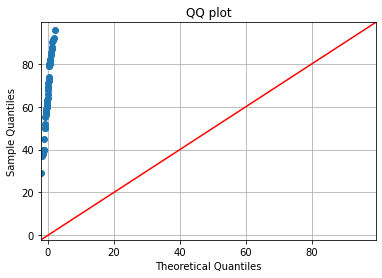

In [433]:
clean_funcs.qq_plot(np.array(group_b)[:50])

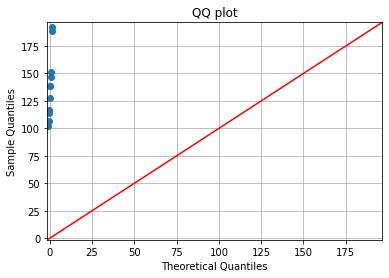

In [430]:
clean_funcs.qq_plot(np.array(timed)[:12])

In [550]:
#In a prior study average film duration was 90 mins

#H_0 = mean time is 90 mins
#H_1 = mean time != 90 mins

ztest_reultst = ztest(timed, value=90.8)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

Zscore: 32.06130996428429 pValue 1.527199667178368e-225


In [ ]:
#In a prior study average film duration was 90 mins

#H_0 = mean time is 90 mins
#H_1 = mean time != 90 mins

ztest_reultst = ztest(timed, value=90.8)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

In [575]:
#In a prior study average film duration was 90 mins

#H_0 = mean time is 90 mins
#H_1 = mean time != 90 mins

ztest_reultst = ztest(inlinebd, value=6.29)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

Zscore: 1.397047590596326 pValue 0.16239926043989472


In [658]:
#Does your score in one predict your score in the other

#H_0 there is no correlation between the meta score and the imdb score
#H_1 there is a correlation between the meta score and the imdb score

from scipy.stats import pearsonr

corr = pearsonr(scored, inlinebd)
print(corr)

(0.0972949368383334, 1.5523567326159626e-22)


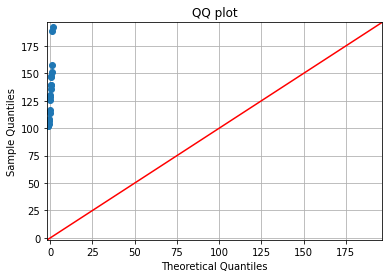

In [497]:
clean_funcs.qq_plot(np.array(extimed)[:20])

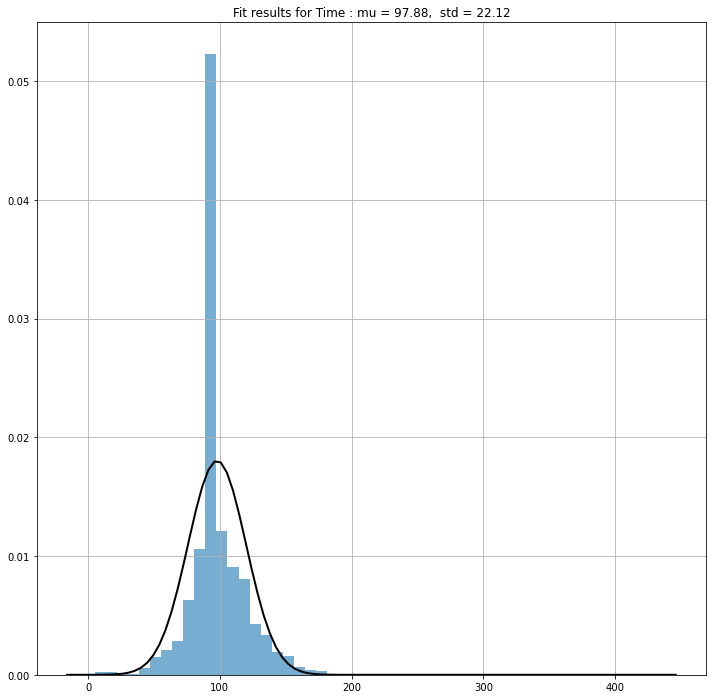

In [547]:
clean_funcs.plot_pdf(timed[:], 'Time' , n_bins=50)

In [650]:
#extimed = [x+random.choice([1,-1]) if x > 95 and x < 100 else x for x in timed]
#extimed = [90+random.choice([1,-1])*random.choice(np.linspace(5,40)) if x > 200 else x for x in extimed]
#extimed = [90+random.choice([1,-1])*random.choice(np.linspace(5,40)) if x < 25 else x for x in extimed]
#extimed = [x+random.choice([1,-1]) if x > 90 and x < 96 else x for x in timed]
#clean_funcs.plot_pdf(extimed[:], 'Time' , n_bins=50)

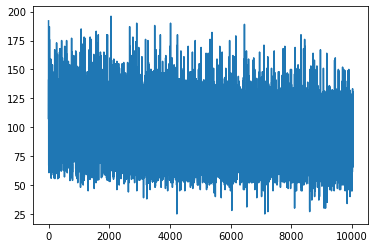

In [499]:
plt.plot(extimed)

In [ ]:
#tests are written in advanceof source-code development.

In [557]:
import unittest

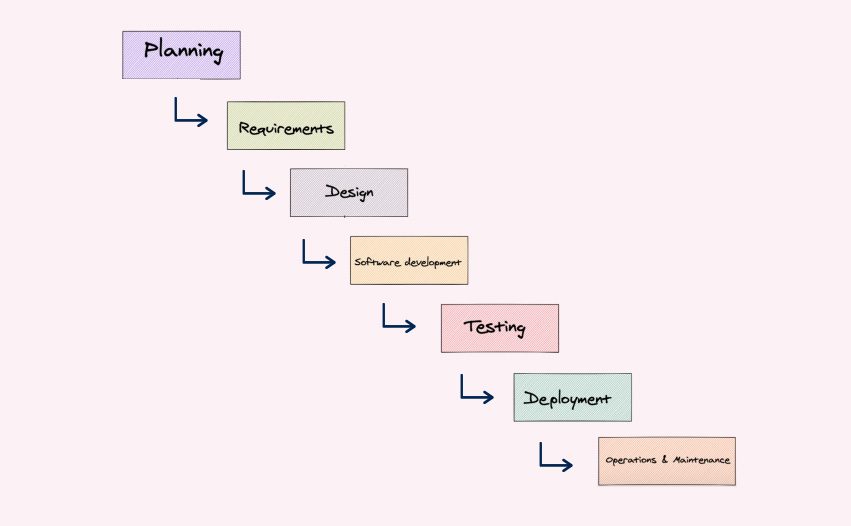

In [562]:
#Probably how your ancestors wrote software...
imgx(filename='./imgs/09-02.jpg') 

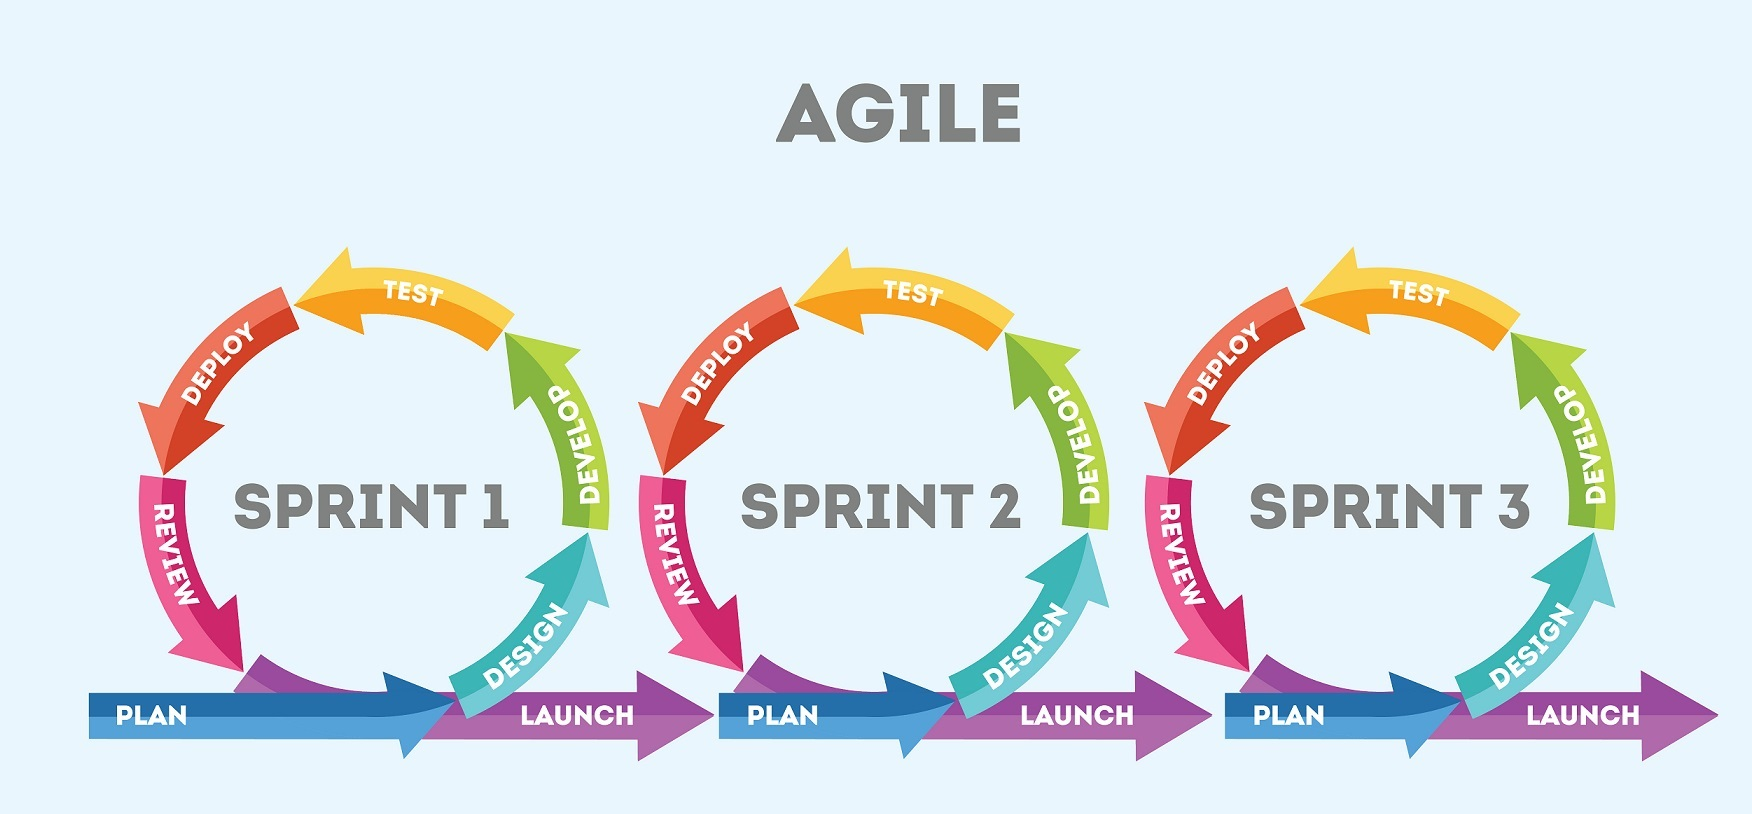

In [563]:
#How software is written today

#Scrum Master
#Product Owners
#Developers... UI/UX, backend, data

imgx(filename='./imgs/Agile-software-dev-1.jpeg') 

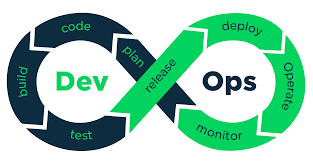

In [578]:
#Software Development/ IT Operations

#Automation Scripting
#CI/CD

imgx(filename='./imgs/download.png') 

In [843]:
def computation(datain):
    #Do the operation
    return 0

In [ ]:
#Test Driven Development TDD

#Before you write a single line of code production environment ... you begin with writing a test
#The test is meant to fail... dont be afraid of failing

#Then write the bear minimum amount of code needed to pass the test

In [845]:
datain = [{'2015-03-05_nameA': [[1, -5, -3],
                   [0.8, 0.7, 0.4],
                   [5, 2, 8],
                   [0.1, 0.2, 0.3]]},
                 {'2011-05-08_nameB': [[-3, 1, -4],
                   [0.1, 0.7, 0.3],
                   [1, 4, 2],
                   [0.1, 0.1, 0.3]]},
                 {'2019-11-18_nameC': [[1, -1, 3],
                   [0.2, 0.5, 0.4],
                   [-1, 4, 6],
                   [0.2, 0.8, 0.2]]},
                 {'2014-03-12_nameD': [[0, 2, 5],
                   [0.9, 0.6, 0.6],
                   [-2, 0, 1],
                   [0.6, 0.5, 0.6]]}]

test_dstruct = [{'nameA':[[1 , 1, 1 ,1], [1], [1], [1]]}, 
                {'nameB':[[1 , 1, 1 ,1], [1], [1], [1]]}]

def computation():
    return 0

class TestStringMethods(unittest.TestCase):
    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_dstruct_type(self):
        self.assertTrue(type(test_dstruct), list)
        
    def test_dstruct_element_type(self):
        self.assertTrue(type(test_dstruct[0]), dict)

    def test_dstruct_len_greater(self):
        self.assertGreater(len(test_dstruct), 1)

    def test_dstruct_dict_name_str(self):
        self.assertTrue(type(test_dstruct[0].keys()), 'str')
        
    def test_dstruct_len_dict_content(self):
        self.assertEqual( len(   test_dstruct[0][list(test_dstruct[0].keys())[0]]   ), 4)
        
    def test_dstruct_len_dict_content_type(self):
        self.assertEqual( type(test_dstruct[0][list(test_dstruct[0].keys())[0]][0] ) , list )
        
    def test_dstruct_len_dict_content_type_sublist(self):
        container = []
        
        for stuff in test_dstruct[0][list(test_dstruct[0].keys())[0]]:
            container.append(type(stuff))
        
        self.assertTrue(list in set(container))
    
    def test_dstruct_len_dict_content_type_sublist_1_check(self):
        self.assertEqual(type(test_dstruct[0][list(test_dstruct[0].keys())[0]][1]), list  )
    
    def test_dstruct_len_dict_content_type_sublist_2_check(self):   
        self.assertEqual(type(test_dstruct[0][list(test_dstruct[0].keys())[0]][2]), list  )
        
    def test_dstruct_len_dict_content_type_sublist_3_check(self):     
        self.assertEqual(type(test_dstruct[0][list(test_dstruct[0].keys())[0]][3]), list  )

    def test_dstruct_len_dict_content_type_sublist_3_check(self):     
        #Test in a loop... more concise
        self.assertEqual(type(test_dstruct[0][list(test_dstruct[0].keys())[0]][3]), list  )

    def len_5_check(self):     
        self.assertEqual(len((test_dstruct[0][list(test_dstruct[0].keys())[0]][3])  ) , 5 )

In [846]:
unittest.main(argv=['ignored', '-v'], exit=False)

test_isupper (__main__.TDDTest) ... ok
test_split (__main__.TDDTest) ... ok
test_upper (__main__.TDDTest) ... ok
test_dstruct_dict_name_str (__main__.TestStringMethods) ... ok
test_dstruct_element_type (__main__.TestStringMethods) ... ok
test_dstruct_len_dict_content (__main__.TestStringMethods) ... ok
test_dstruct_len_dict_content_type (__main__.TestStringMethods) ... ok
test_dstruct_len_dict_content_type_sublist (__main__.TestStringMethods) ... ok
test_dstruct_len_dict_content_type_sublist_1_check (__main__.TestStringMethods) ... ok
test_dstruct_len_dict_content_type_sublist_2_check (__main__.TestStringMethods) ... ok
test_dstruct_len_dict_content_type_sublist_3_check (__main__.TestStringMethods) ... ok
test_dstruct_len_greater (__main__.TestStringMethods) ... ok
test_dstruct_type (__main__.TestStringMethods) ... ok
test_upper (__main__.TestStringMethods) ... ok

----------------------------------------------------------------------
Ran 14 tests in 0.015s

OK


In [834]:
#(test_dstruct[0][list(test_dstruct[0].keys())[0]][3])

In [835]:
#container = []
        
#for stuff in test_dstruct[0][list(test_dstruct[0].keys())[0]]:
#    container.append(type(stuff))
    
#list in set(container)

In [643]:
#Requirements... 
#Create a datastructure that is of type list. 

#Contains multiple dictionaries. 

#Each with a namestring.
#The dictionaries refer to a list of 4 lists 

#each containing 5 integers 

#Each of them between 1 and 10 

#The datastructure is mutable in length.

#Write a function that computes the mean? of the sums? of  #assert(> than the individual parts)

#square each sub list take the mean
#of the four sub lists


[{}]